In [1]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN 
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
import seaborn as sns
import pickle
import functools
import fastdtw
import scipy.spatial.distance as sd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

2022-06-09 19:49:54.598627: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 19:49:54.598654: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
consumption_df = pd.read_csv('Final Datasets/energy_consumption.csv')
clustered_df = pd.read_csv('Tables/clustered_AfterStandardization_K=5.csv')

In [3]:
consumption_df

,Unnamed: 0,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,0,2012-06-01 01:00:00,1.0110,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,1,2012-06-01 02:00:00,0.4510,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2,2012-06-01 03:00:00,0.5050,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,3,2012-06-01 04:00:00,0.4410,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,4,2012-06-01 05:00:00,0.4680,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...,...
611013,123761,2020-05-19 19:00:00,3.5802,28,0.028408,0.038470,0.069307,0.801381,0.002441
611014,123762,2020-05-19 20:00:00,3.4398,28,0.027762,0.038479,0.067384,0.770210,0.002348
611015,123763,2020-05-19 21:00:00,2.3049,28,0.022537,0.038556,0.051836,0.518247,0.001601
611016,123764,2020-05-19 22:00:00,2.4921,28,0.023399,0.038544,0.054401,0.559808,0.001724


In [4]:
# clustered_df

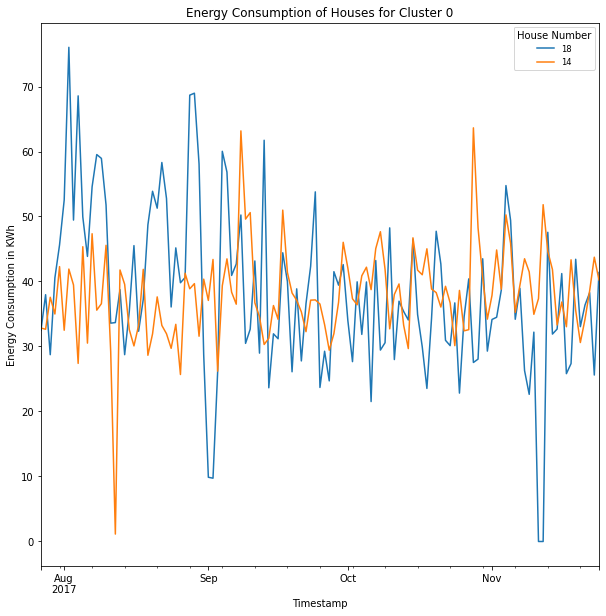

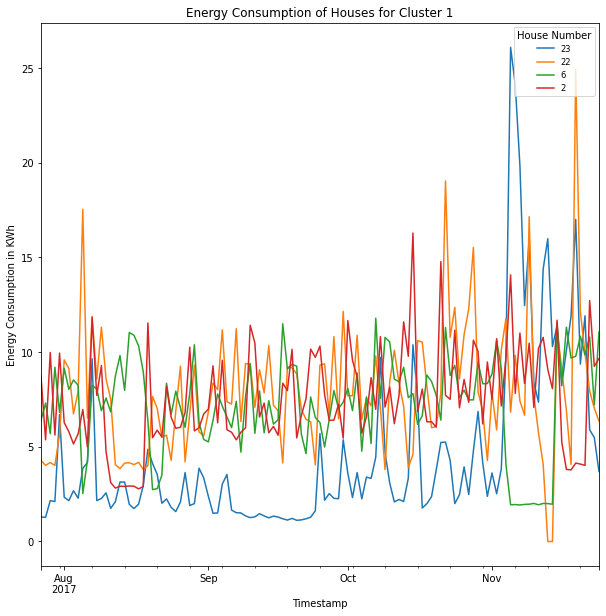

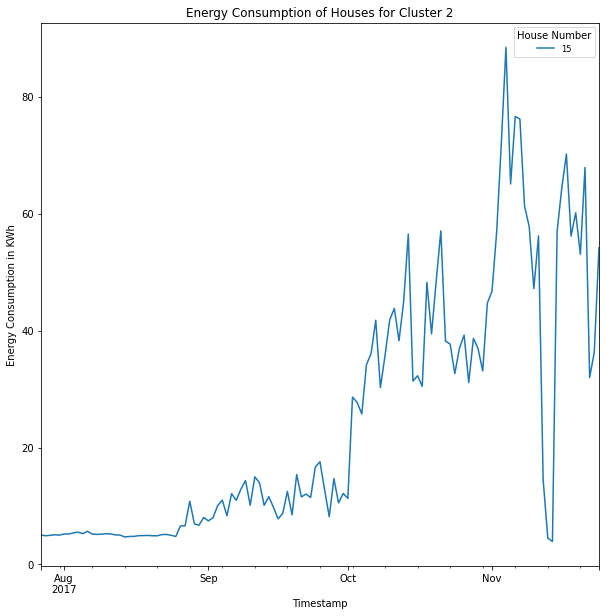

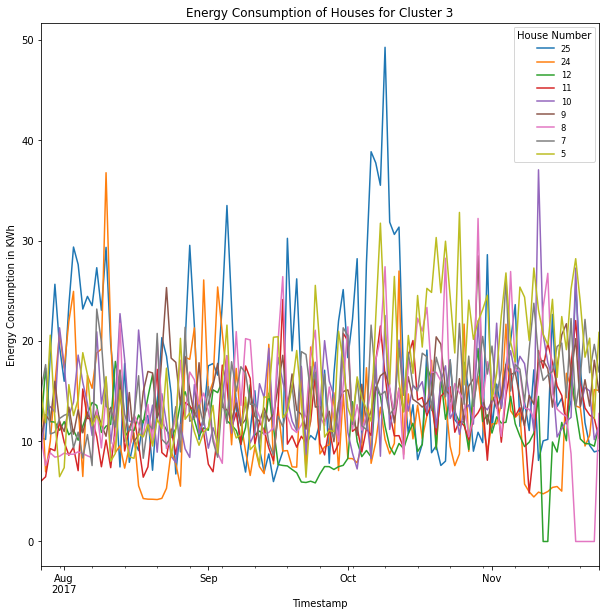

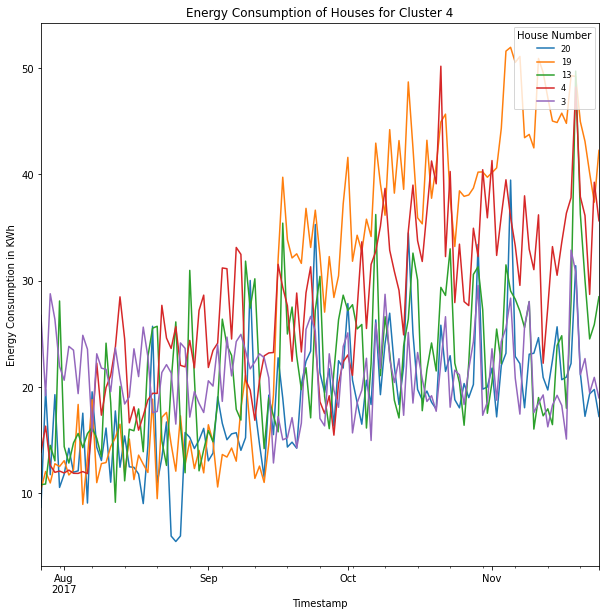

In [5]:
for cluster in range(1+ max(clustered_df['Cluster'])):
    houses = list(clustered_df[clustered_df['Cluster'] == cluster]['House'])
    houses = list(clustered_df[clustered_df['Cluster'] == cluster]['House'])
    clustered_consumption_df = consumption_df[consumption_df['House Number'].isin(houses)][['timestamp', 'energy_kWh','House Number']]
    clustered_consumption_df = clustered_consumption_df[(clustered_consumption_df['timestamp'] <= '2017-11-25') & (clustered_consumption_df['timestamp'] >= '2017-07-27')]
    graph_df = pd.DataFrame(clustered_consumption_df['timestamp'].unique(), columns=['timestamp'])
    for house in houses:
        house_df = clustered_consumption_df[clustered_consumption_df['House Number'] == house][['timestamp', 'energy_kWh']]
        house_df.rename(columns = {'energy_kWh':house}, inplace = True)
        graph_df = pd.merge(house_df,graph_df, on='timestamp', how='right')
        graph_df = graph_df.drop_duplicates(subset='timestamp', keep="last")
    graph_df['timestamp'] = pd.to_datetime(graph_df['timestamp'])
    graph_df.set_index('timestamp', inplace=True)
    graph_df = graph_df.resample("D").agg('sum')
    ax = graph_df.plot(figsize=(10,10), title=f'Energy Consumption of Houses for Cluster {cluster}')
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Energy Consumption in KWh")
    ax.legend(title='House Number',
                    loc=1, fontsize='small', fancybox=True)

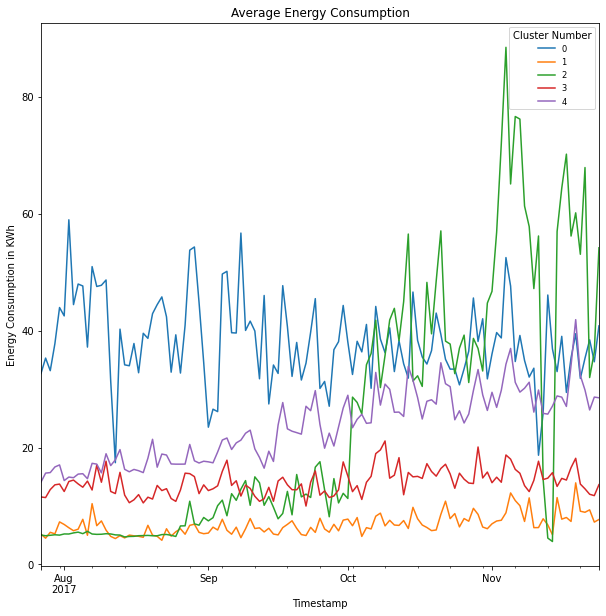

In [12]:
for cluster in range(1+ max(clustered_df['Cluster'])):
    houses = list(clustered_df[clustered_df['Cluster'] == cluster]['House'])
    houses = list(clustered_df[clustered_df['Cluster'] == cluster]['House'])
    clustered_consumption_df = consumption_df[consumption_df['House Number'].isin(houses)][['timestamp', 'energy_kWh','House Number']]
    clustered_consumption_df = clustered_consumption_df[(clustered_consumption_df['timestamp'] <= '2017-11-25') & (clustered_consumption_df['timestamp'] >= '2017-07-27')]
    graph_df = pd.DataFrame(clustered_consumption_df['timestamp'].unique(), columns=['timestamp'])
    for house in houses:
        house_df = clustered_consumption_df[clustered_consumption_df['House Number'] == house][['timestamp', 'energy_kWh']]
        house_df.rename(columns = {'energy_kWh':house}, inplace = True)
        graph_df = pd.merge(house_df,graph_df, on='timestamp', how='right')
        graph_df = graph_df.drop_duplicates(subset='timestamp', keep="last")
    graph_df['timestamp'] = pd.to_datetime(graph_df['timestamp'])
    graph_df.set_index('timestamp', inplace=True)
    graph_df = graph_df.resample("D").agg('sum')
    graph_df[cluster] = graph_df.sum(axis=1)/len(houses)
    graph_df = graph_df[cluster]
    ax = graph_df.plot(figsize=(10,10), title=f'Average Energy Consumption')
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Energy Consumption in KWh")
    ax.legend(title='Cluster Number',
                    loc=1, fontsize='small', fancybox=True)

timestamp
2017-07-27    14.080
2017-07-28    15.630
2017-07-29    15.718
2017-07-30    16.680
2017-07-31    17.030
               ...  
2017-11-20    32.314
2017-11-21    29.836
2017-11-22    26.434
2017-11-23    28.638
2017-11-24    28.518
Freq: D, Name: Average, Length: 121, dtype: float64